# Stress Detection Dataset
![Screenshot 2024-12-23 225511.png](<attachment:Screenshot 2024-12-23 225511.png>)
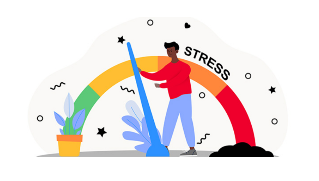

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

from imblearn.over_sampling import SMOTE ,RandomOverSampler

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_auc_score,recall_score,precision_score, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold,train_test_split
from sklearn.feature_selection import SelectFromModel,mutual_info_classif,RFE


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Thông tin dữ liệu 
Nguồn: https://www.kaggle.com/datasets/swadeshi/stress-detection-dataset

In [2]:
df=pd.read_csv(r'D:\Project_2\stress_detection.csv')

In [3]:
df

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,100,26,30,2.529821,2.339608,1.321208,4.204331,4.890738,8.823033,8.703758,8.661936,2,59.106125,0,1,11.339248,4.045863,1.694037,0.859401,4.123621
2996,100,27,33,1.319100,4.500507,4.816983,2.416180,4.195933,5.260243,5.890244,6.456058,4,56.137068,12,17,10.694380,2.169768,1.657737,0.108480,2.242326
2997,100,28,30,1.899102,3.930147,4.047799,3.163160,2.559401,6.425568,7.978066,7.188921,3,58.102473,13,21,8.646478,4.995654,1.046666,0.508623,2.088313
2998,100,29,28,1.472408,1.712893,1.245082,4.187222,4.558563,5.453843,8.859173,7.355107,4,44.220070,17,10,4.086836,4.897873,1.605314,0.444716,4.741065


In [4]:
df.head(5)      

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132


In [5]:
df.shape

(3000, 20)

Bộ dữ liệu này bao gồm 3000 bản ghi và 20 đặc trưng (features)
- participant_id          : Mã định danh người tham gia  
- day                     : Ngày tham gia
- PSS_score               : Thang đo căng thẳng nhận thức
- Openness                : Thước đo sự cởi mở, đặc điểm về tính cách
- Conscientiousness       : Thước đo sự tận tâm, một đặc điểm tính cách
- Extraversion            : Thước đo về sự hướng ngoại, một đặc điểm tính cách
- Agreeableness           : Thước đo về sự dễ chịu, một đặc điểm tính cách
- Neuroticism             : Thước đo về sự rối loạn thần kinh, một đặc điểm tính cách
- sleep_time              : Thời gian người tham gia bắt đầu đi ngủ (tính bằng giờ)
- wake_time               : Thời gian người tham gia bắt đầu thức dậy (tính bằng giờ)
- sleep_duration          : Thời lượng giờ người tham gia đi ngủ (tính bằng giờ)
- PSQI_score              : Điểm chỉ số chất lượng giấc ngủ
- call_duration           : Tổng thời lượng gọi điện trong ngày (tính bằng phút)
- num_calls               : Số cuộc gọi được thực hiện trong ngày 
- num_sms                 : Số cuộc gọi tin nhắn SMS trong ngày
- screen_on_time          : Tổng thời gian bật màn hình (tính bằng giờ)
- skin_conductance        : Đo độ dẫn của da, cho thấy phản ứng kích thích hoặc căng thẳng
- accelerometer           : Dữ liệu gia tốc kế, đại diện cho chuyển động vật lý (tính bằng g-force)
- mobility_radius         : Bán kính di chuyển của người tham gia (tính bằng km)
- mobility_distance       : Tổng quãng đường di chuyển trong ngày(tính bằng km)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   participant_id     3000 non-null   int64  
 1   day                3000 non-null   int64  
 2   PSS_score          3000 non-null   int64  
 3   Openness           3000 non-null   float64
 4   Conscientiousness  3000 non-null   float64
 5   Extraversion       3000 non-null   float64
 6   Agreeableness      3000 non-null   float64
 7   Neuroticism        3000 non-null   float64
 8   sleep_time         3000 non-null   float64
 9   wake_time          3000 non-null   float64
 10  sleep_duration     3000 non-null   float64
 11  PSQI_score         3000 non-null   int64  
 12  call_duration      3000 non-null   float64
 13  num_calls          3000 non-null   int64  
 14  num_sms            3000 non-null   int64  
 15  screen_on_time     3000 non-null   float64
 16  skin_conductance   3000 

In [7]:
df.nunique()

participant_id        100
day                    30
PSS_score              30
Openness             3000
Conscientiousness    3000
Extraversion         3000
Agreeableness        3000
Neuroticism          3000
sleep_time           3000
wake_time            3000
sleep_duration       3000
PSQI_score              4
call_duration        3000
num_calls              20
num_sms                50
screen_on_time       3000
skin_conductance     3000
accelerometer        3000
mobility_radius      3000
mobility_distance    3000
dtype: int64

In [8]:
df.isnull().sum()

participant_id       0
day                  0
PSS_score            0
Openness             0
Conscientiousness    0
Extraversion         0
Agreeableness        0
Neuroticism          0
sleep_time           0
wake_time            0
sleep_duration       0
PSQI_score           0
call_duration        0
num_calls            0
num_sms              0
screen_on_time       0
skin_conductance     0
accelerometer        0
mobility_radius      0
mobility_distance    0
dtype: int64

In [9]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
participant_id,3000.0,50.500000,28.870882,1.000000,25.750000,50.500000,75.250000,100.000000
day,3000.0,15.500000,8.656884,1.000000,8.000000,15.500000,23.000000,30.000000
PSS_score,3000.0,24.701000,8.615781,10.000000,17.000000,25.000000,32.000000,39.000000
Openness,3000.0,3.020663,1.159310,1.005003,2.024510,3.050115,4.029171,4.997405
Conscientiousness,3000.0,3.007883,1.140511,1.000982,2.055579,3.022064,3.981639,4.999137
Extraversion,3000.0,3.002101,1.143507,1.000584,2.018888,2.985548,4.005973,4.997642
Agreeableness,3000.0,3.047659,1.161074,1.002206,2.043813,3.091778,4.050223,4.999881
Neuroticism,3000.0,2.963589,1.158624,1.000173,1.974606,2.940948,3.955566,4.996408
sleep_time,3000.0,7.002145,1.160442,5.003291,6.017217,6.978221,8.029503,8.999948
wake_time,3000.0,6.990567,1.161225,5.001927,5.992499,6.982260,7.999644,8.998371


In [10]:
info = pd.DataFrame()
info.insert(0,"Data Type",df.dtypes ,True)
info.insert(1,"Column Real Name",df.columns,True)
info.insert(2,"IsNull",df.isnull().sum(),True)
info.insert(3,"IsNa",df.isna().sum(),True)
info.insert(4,"Unique",df.nunique(),True)
info.insert(5,"Duplicate Values",df.duplicated().sum(),True)
info.insert(6,"Min",df.min(),True)
info.insert(7,"Max",df.max(),True)
info.transpose().T

,Data Type,Column Real Name,IsNull,IsNa,Unique,Duplicate Values,Min,Max
participant_id,int64,participant_id,0,0,100,0,1.0,100.0
day,int64,day,0,0,30,0,1.0,30.0
PSS_score,int64,PSS_score,0,0,30,0,10.0,39.0
Openness,float64,Openness,0,0,3000,0,1.005003,4.997405
Conscientiousness,float64,Conscientiousness,0,0,3000,0,1.000982,4.999137
Extraversion,float64,Extraversion,0,0,3000,0,1.000584,4.997642
Agreeableness,float64,Agreeableness,0,0,3000,0,1.002206,4.999881
Neuroticism,float64,Neuroticism,0,0,3000,0,1.000173,4.996408
sleep_time,float64,sleep_time,0,0,3000,0,5.003291,8.999948
wake_time,float64,wake_time,0,0,3000,0,5.001927,8.998371


Kết luận :
1. Dữ liệu hiện tại không chứa các dữ liệu rỗng hoặc dữ liệu khuyết thiếu.
2. Cột mã gồm 100 người tham gia thực hiện đánh giá và khảo sát trong 30 ngày.
3. Chỉ số cần chú tâm nhất là chỉ số PSS (PSS_score): đánh giá mực độ căng thẳng mà một người đang mắc phải. (Chỉ số từ 10-39)      
Mục tiêu của chúng ta là phân loại ra được người bị căng thẳng và người không căng thẳng
    Nhóm không căng thẳng (0-13)
    Nhóm căng thẳng (vừa và cao) (14-39)
    Nguồn: https://ahaslides.com/vi/blog/level-stress-test/
4. Chỉ số giấc ngủ PSQI (PSQI_score): Đánh giá chất lượng giấc ngủ. (Chỉ số từ 1-4) cho thấy những người tham gia có giấc ngủ tốt   
    * 0–5: Chất lượng giấc ngủ tốt.
    * 6–10: Chất lượng giấc ngủ trung bình, có thể có vấn đề nhẹ.
    * Trên 10: Chất lượng giấc ngủ kém, có thể cần can thiệp y khoa hoặc thay đổi lối sống.
5. Không có giá trị nào trùng lặp nào trong tệp dữ liệu.


# Trực quan hóa dữ liệu

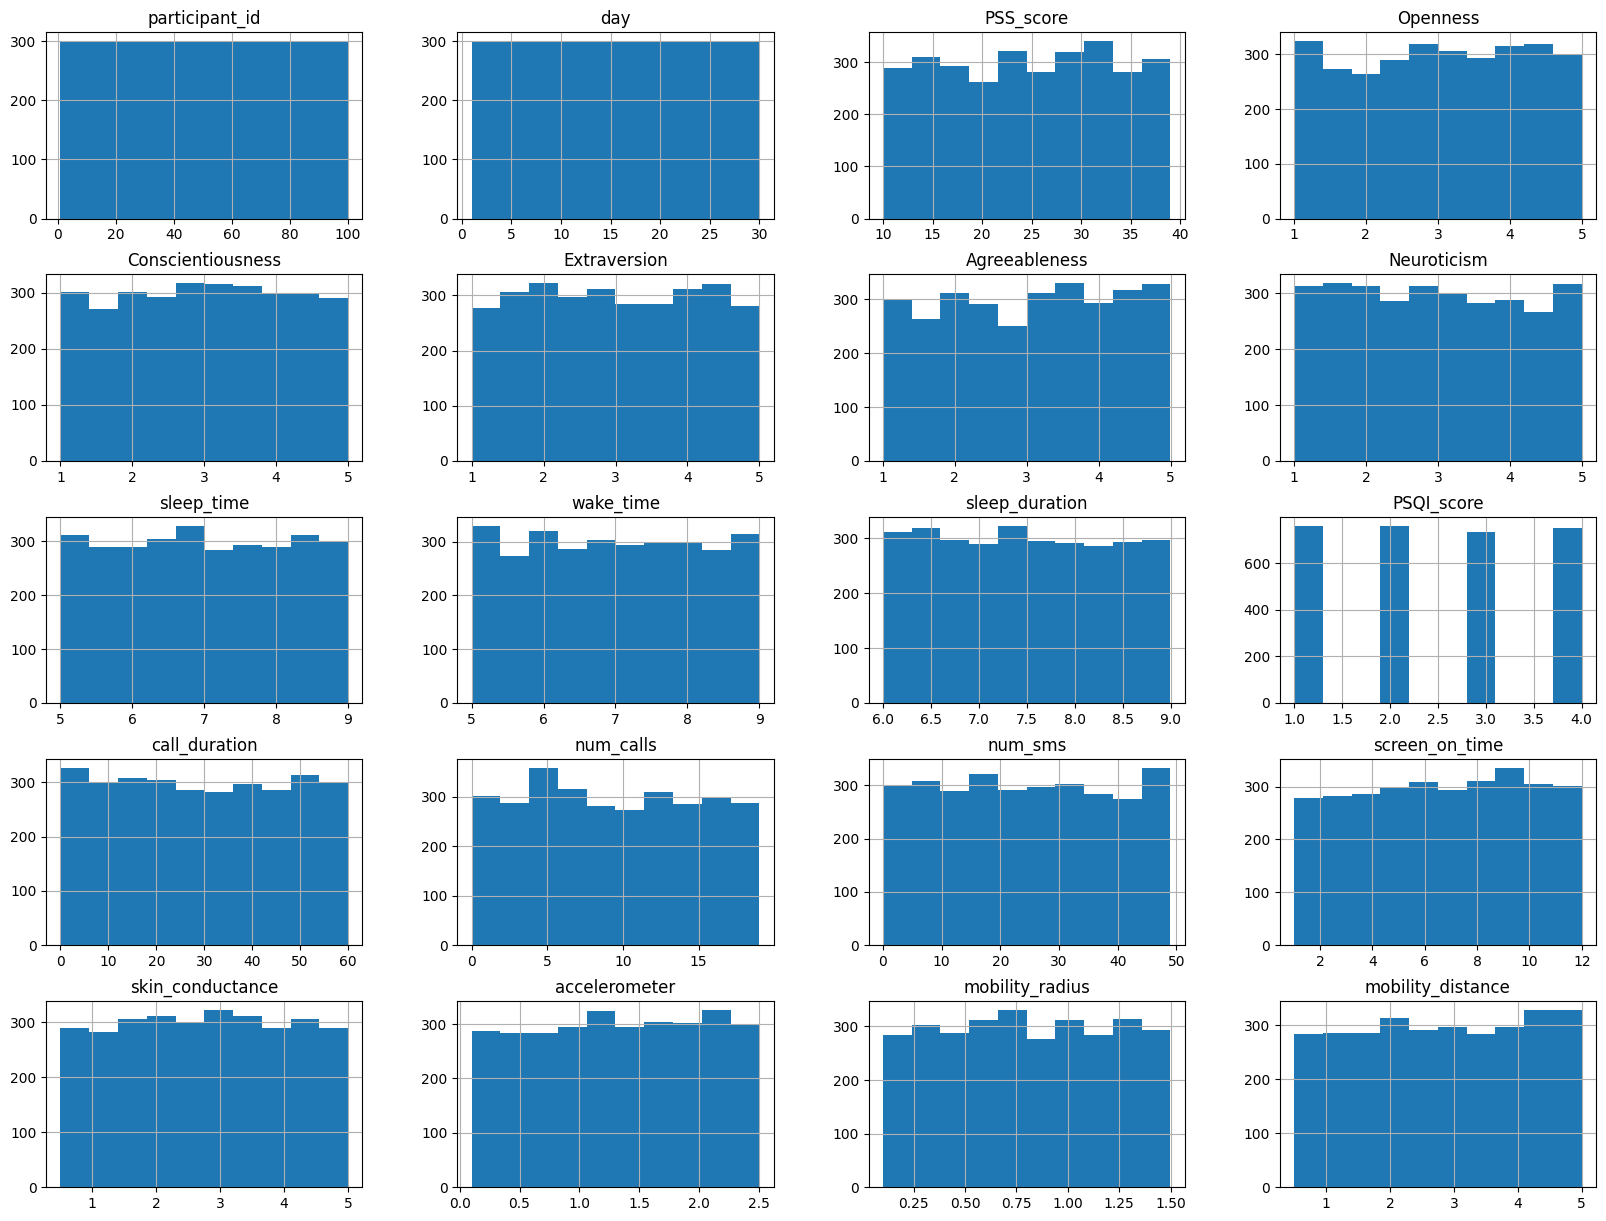

In [11]:
df.hist(figsize=(20,15))
plt.get_figlabels()
plt.show()

Mục tiêu đầu ra là nguy cơ mắc bênh/ Khả năng có bệnh
* Input: ...
* Output: PSS_score
--> Giúp phân loại xem người này có bị căng thẳng không, vì vậy ta sẽ xét 2 khoảng:
    * 0-13: Không căng thẳng (Biểu thị nhóm người căng thẳng thấp)
    * 14-40: Căng thẳng (Biểu thị bằng nhóm người căng thẳng vừa và cao)

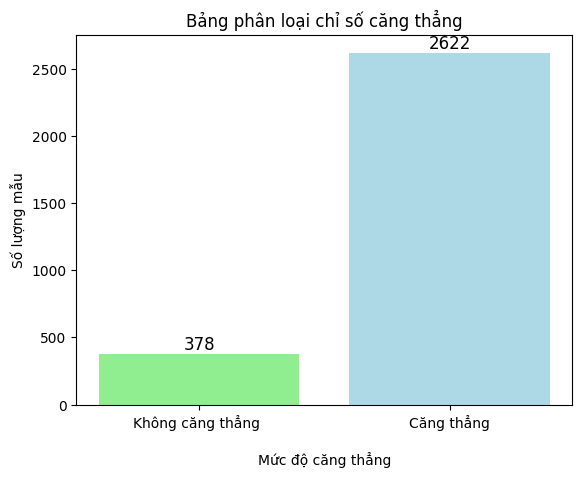

In [12]:
# Phân loại các điểm số vào các nhóm
dont_stress = np.sum(df['PSS_score'] <= 13)
stress = np.sum(df['PSS_score'] >= 14)


# Vẽ biểu đồ cột
categories = ['Không căng thẳng \n', 'Căng thẳng\n']
values = [dont_stress,stress,]

fig, ax = plt.subplots()

bars = ax.bar(categories, values, color=['lightgreen', 'lightblue'])

# Thêm tiêu đề và nhãn
plt.title('Bảng phân loại chỉ số căng thẳng')
plt.xlabel('Mức độ căng thẳng')
plt.ylabel('Số lượng mẫu')

# Hiển thị số lượng lên trên mỗi cột
for bar in bars:
    yval = bar.get_height()  # Lấy chiều cao của mỗi cột
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, str(int(yval)), 
            ha='center', va='bottom', fontsize=12)  # Hiển thị giá trị trên cột

# Hiển thị biểu đồ
plt.show()

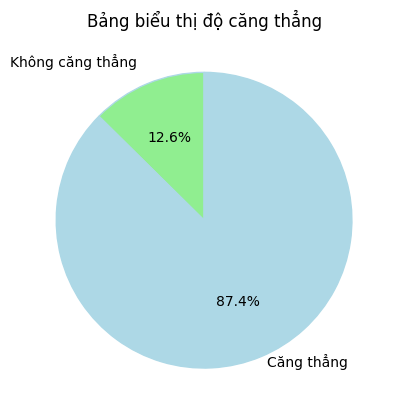

In [13]:
# Vẽ biểu đồ tròn
fig, ax = plt.subplots()
ax.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightblue', 'red'], wedgeprops={'edgecolor': 'lightblue'})

# Thêm tiêu đề
plt.title('Bảng biểu thị độ căng thẳng')

# Hiển thị biểu đồ
plt.show()

# Tiền xử lý dữ liệu

In [14]:
data=df.copy()

In [15]:
data.tail()

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
2995,100,26,30,2.529821,2.339608,1.321208,4.204331,4.890738,8.823033,8.703758,8.661936,2,59.106125,0,1,11.339248,4.045863,1.694037,0.859401,4.123621
2996,100,27,33,1.319100,4.500507,4.816983,2.416180,4.195933,5.260243,5.890244,6.456058,4,56.137068,12,17,10.694380,2.169768,1.657737,0.108480,2.242326
2997,100,28,30,1.899102,3.930147,4.047799,3.163160,2.559401,6.425568,7.978066,7.188921,3,58.102473,13,21,8.646478,4.995654,1.046666,0.508623,2.088313
2998,100,29,28,1.472408,1.712893,1.245082,4.187222,4.558563,5.453843,8.859173,7.355107,4,44.220070,17,10,4.086836,4.897873,1.605314,0.444716,4.741065
2999,100,30,10,3.152789,3.633976,2.387994,3.853524,1.147076,5.270021,6.658582,7.090551,4,36.342934,16,47,7.399881,3.279636,2.130984,1.347205,4.191338


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   participant_id     3000 non-null   int64  
 1   day                3000 non-null   int64  
 2   PSS_score          3000 non-null   int64  
 3   Openness           3000 non-null   float64
 4   Conscientiousness  3000 non-null   float64
 5   Extraversion       3000 non-null   float64
 6   Agreeableness      3000 non-null   float64
 7   Neuroticism        3000 non-null   float64
 8   sleep_time         3000 non-null   float64
 9   wake_time          3000 non-null   float64
 10  sleep_duration     3000 non-null   float64
 11  PSQI_score         3000 non-null   int64  
 12  call_duration      3000 non-null   float64
 13  num_calls          3000 non-null   int64  
 14  num_sms            3000 non-null   int64  
 15  screen_on_time     3000 non-null   float64
 16  skin_conductance   3000 

In [17]:
data.columns

Index(['participant_id', 'day', 'PSS_score', 'Openness', 'Conscientiousness',
       'Extraversion', 'Agreeableness', 'Neuroticism', 'sleep_time',
       'wake_time', 'sleep_duration', 'PSQI_score', 'call_duration',
       'num_calls', 'num_sms', 'screen_on_time', 'skin_conductance',
       'accelerometer', 'mobility_radius', 'mobility_distance'],
      dtype='object')

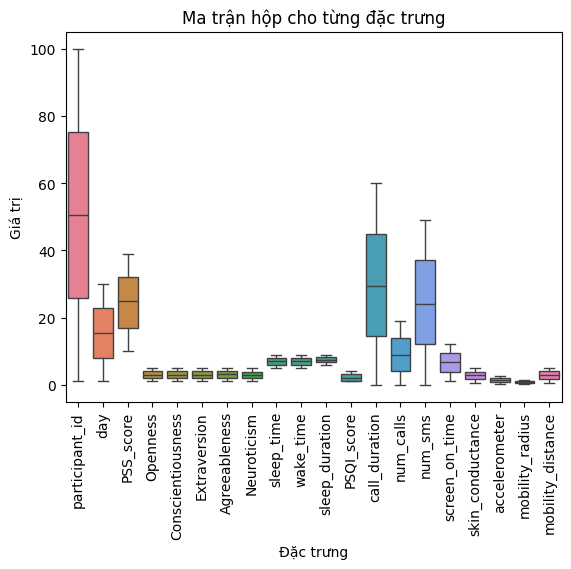

In [18]:
plt.Figure(figsize=(12,6))
sns.boxplot(data=data)

#Thêm tiêu đề và nhãn
plt.title("Ma trận hộp cho từng đặc trưng") 
plt.xlabel("Đặc trưng")
plt.ylabel("Giá trị")
plt.xticks(rotation=90)
plt.show()

Xử lý outliers bằng phương pháp IQR.   
 
   Thay giá trị ngoại lai bằng giới hạn gần nhất (clipping).
    
   Parameters:
   - df: DataFrame chứa dữ liệu
   - columns: Danh sách các cột cần xử lý outliers
    
   Returns:
   - DataFrame sau khi xử lý

In [19]:
def handle_outliers_iqr(data, columns):
    for col in columns:
        if data[col].dtype in ['int64', 'float64']:  # Chỉ xử lý dữ liệu số
            Q1 = data[col].quantile(0.25)  # Tính Q1 (quartile 1)   quatile:25%
            Q3 = data[col].quantile(0.75)  # Tính Q3 (quartile 3)   quatile:75%
            IQR = Q3 - Q1                  # Tính IQR: Khoảng cách liên tứ phân vị
            lower_bound = Q1 - 1.5 * IQR   # Giới hạn dưới
            upper_bound = Q3 + 1.5 * IQR   # Giới hạn trên

            # Clipping các giá trị ngoài khoảng
            data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
            data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

In [20]:
columns_to_process = ['Openness','Conscientiousness',
                      'Extraversion','Agreeableness',
                      'Neuroticism','sleep_time',
                      'wake_time','sleep_duration',
                      'PSQI_score','call_duration',
                      'num_calls','num_sms','screen_on_time',
                      'skin_conductance','accelerometer',
                      'mobility_radius','mobility_distance']
data_cleaned=handle_outliers_iqr(data,columns_to_process)

In [21]:
data_cleaned.tail(5)

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
2995,100,26,30,2.529821,2.339608,1.321208,4.204331,4.890738,8.823033,8.703758,8.661936,2.0,59.106125,0.0,1.0,11.339248,4.045863,1.694037,0.859401,4.123621
2996,100,27,33,1.319100,4.500507,4.816983,2.416180,4.195933,5.260243,5.890244,6.456058,4.0,56.137068,12.0,17.0,10.694380,2.169768,1.657737,0.108480,2.242326
2997,100,28,30,1.899102,3.930147,4.047799,3.163160,2.559401,6.425568,7.978066,7.188921,3.0,58.102473,13.0,21.0,8.646478,4.995654,1.046666,0.508623,2.088313
2998,100,29,28,1.472408,1.712893,1.245082,4.187222,4.558563,5.453843,8.859173,7.355107,4.0,44.220070,17.0,10.0,4.086836,4.897873,1.605314,0.444716,4.741065
2999,100,30,10,3.152789,3.633976,2.387994,3.853524,1.147076,5.270021,6.658582,7.090551,4.0,36.342934,16.0,47.0,7.399881,3.279636,2.130984,1.347205,4.191338


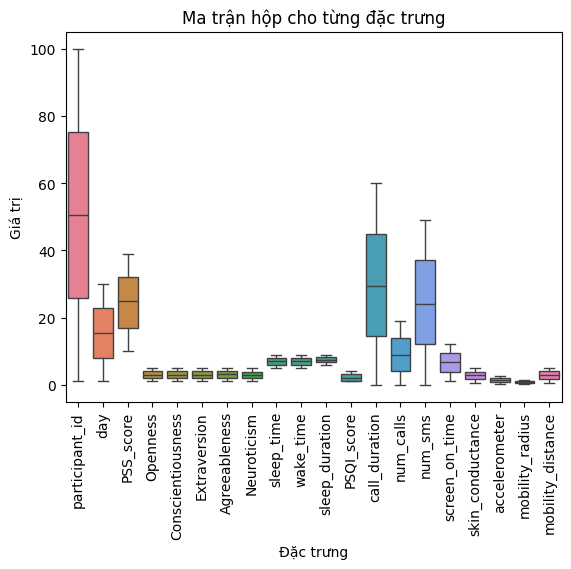

In [22]:
plt.Figure(figsize=(12,6))
sns.boxplot(data=data_cleaned)

#Thêm tiêu đề và nhãn
plt.title("Ma trận hộp cho từng đặc trưng") 
plt.xlabel("Đặc trưng")
plt.ylabel("Giá trị")
plt.xticks(rotation=90)
plt.show()

Nhằm dễ dàng cho việc phân loại thì ta đem dữ liệu cột PSS_score chia thành 2 loại là: Không căng thẳng, căng thẳng

In [23]:
data_cleaned['PSS_score_category'] = pd.cut(
    data['PSS_score'],
    bins=[0, 13, 40], 
    labels=[0, 1]
)
data_cleaned.drop(columns=['PSS_score'],inplace=True)

In [24]:
data_cleaned['PSS_score_category']=data_cleaned['PSS_score_category'].astype(int)

In [25]:
data_cleaned.tail()

,participant_id,day,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance,PSS_score_category
2995,100,26,2.529821,2.339608,1.321208,4.204331,4.890738,8.823033,8.703758,8.661936,2.0,59.106125,0.0,1.0,11.339248,4.045863,1.694037,0.859401,4.123621,1
2996,100,27,1.319100,4.500507,4.816983,2.416180,4.195933,5.260243,5.890244,6.456058,4.0,56.137068,12.0,17.0,10.694380,2.169768,1.657737,0.108480,2.242326,1
2997,100,28,1.899102,3.930147,4.047799,3.163160,2.559401,6.425568,7.978066,7.188921,3.0,58.102473,13.0,21.0,8.646478,4.995654,1.046666,0.508623,2.088313,1
2998,100,29,1.472408,1.712893,1.245082,4.187222,4.558563,5.453843,8.859173,7.355107,4.0,44.220070,17.0,10.0,4.086836,4.897873,1.605314,0.444716,4.741065,1
2999,100,30,3.152789,3.633976,2.387994,3.853524,1.147076,5.270021,6.658582,7.090551,4.0,36.342934,16.0,47.0,7.399881,3.279636,2.130984,1.347205,4.191338,0


In [26]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   participant_id      3000 non-null   int64  
 1   day                 3000 non-null   int64  
 2   Openness            3000 non-null   float64
 3   Conscientiousness   3000 non-null   float64
 4   Extraversion        3000 non-null   float64
 5   Agreeableness       3000 non-null   float64
 6   Neuroticism         3000 non-null   float64
 7   sleep_time          3000 non-null   float64
 8   wake_time           3000 non-null   float64
 9   sleep_duration      3000 non-null   float64
 10  PSQI_score          3000 non-null   float64
 11  call_duration       3000 non-null   float64
 12  num_calls           3000 non-null   float64
 13  num_sms             3000 non-null   float64
 14  screen_on_time      3000 non-null   float64
 15  skin_conductance    3000 non-null   float64
 16  accele

In [27]:
data_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
participant_id,3000.0,50.500000,28.870882,1.000000,25.750000,50.500000,75.250000,100.000000
day,3000.0,15.500000,8.656884,1.000000,8.000000,15.500000,23.000000,30.000000
Openness,3000.0,3.020663,1.159310,1.005003,2.024510,3.050115,4.029171,4.997405
Conscientiousness,3000.0,3.007883,1.140511,1.000982,2.055579,3.022064,3.981639,4.999137
Extraversion,3000.0,3.002101,1.143507,1.000584,2.018888,2.985548,4.005973,4.997642
Agreeableness,3000.0,3.047659,1.161074,1.002206,2.043813,3.091778,4.050223,4.999881
Neuroticism,3000.0,2.963589,1.158624,1.000173,1.974606,2.940948,3.955566,4.996408
sleep_time,3000.0,7.002145,1.160442,5.003291,6.017217,6.978221,8.029503,8.999948
wake_time,3000.0,6.990567,1.161225,5.001927,5.992499,6.982260,7.999644,8.998371
sleep_duration,3000.0,7.477953,0.867602,6.000561,6.710527,7.463421,8.222883,8.999061


In [28]:
data_cleaned.isna().sum()

participant_id        0
day                   0
Openness              0
Conscientiousness     0
Extraversion          0
Agreeableness         0
Neuroticism           0
sleep_time            0
wake_time             0
sleep_duration        0
PSQI_score            0
call_duration         0
num_calls             0
num_sms               0
screen_on_time        0
skin_conductance      0
accelerometer         0
mobility_radius       0
mobility_distance     0
PSS_score_category    0
dtype: int64

# Huấn luyện mô hình

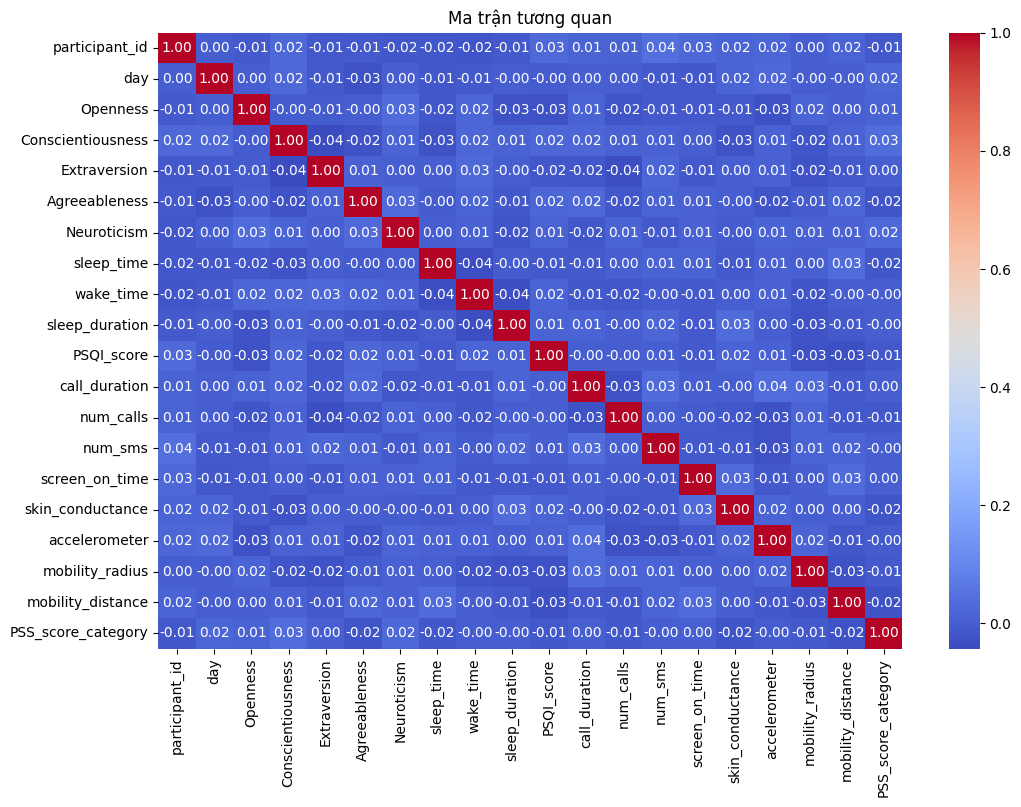

In [29]:
# Ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan")
plt.show()

In [30]:
feature_names=['Openness','Conscientiousness',
                'Extraversion','Agreeableness',
                'Neuroticism','sleep_time','wake_time',
                'sleep_duration','PSQI_score','call_duration',
                'num_calls','num_sms','screen_on_time',
                'skin_conductance','accelerometer',
                'mobility_radius','mobility_distance']

In [31]:
X=data_cleaned[['Openness','Conscientiousness',
                'Extraversion','Agreeableness',
                'Neuroticism','sleep_time','wake_time',
                'sleep_duration','PSQI_score','call_duration',
                'num_calls','num_sms','screen_on_time',
                'skin_conductance','accelerometer',
                'mobility_radius','mobility_distance']].values
y=data_cleaned['PSS_score_category'].values

Cùng xem lại nhãn   
* Không căng thẳng: nhãn 0
* Căng thẳng: nhãn 1

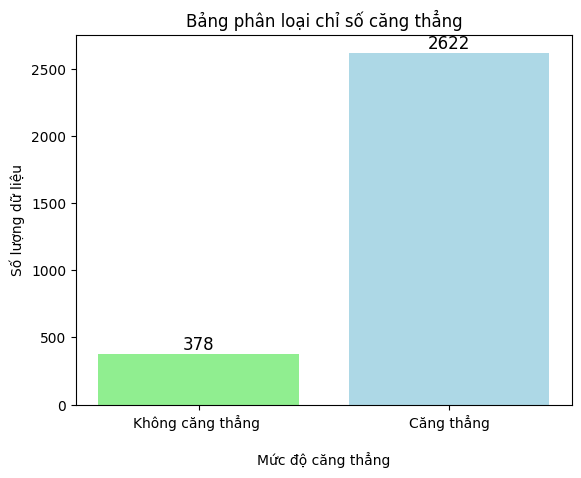

In [32]:
# Phân loại các điểm số vào các nhóm
dont_stress = np.sum(data_cleaned['PSS_score_category'] == 0 )
stress = np.sum(data_cleaned['PSS_score_category'] == 1) 

# Vẽ biểu đồ cột
categories = ['Không căng thẳng \n', 'Căng thẳng\n']
values = [dont_stress,stress]

fig, ax = plt.subplots()
bars = ax.bar(categories, values, color=['lightgreen', 'lightblue'])

# Thêm tiêu đề và nhãn
plt.title('Bảng phân loại chỉ số căng thẳng')
plt.xlabel('Mức độ căng thẳng')
plt.ylabel('Số lượng dữ liệu')

# Hiển thị số lượng lên trên mỗi cột
for bar in bars:
    yval = bar.get_height()  # Lấy chiều cao của mỗi cột
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, str(int(yval)), 
            ha='center', va='bottom', fontsize=12)  # Hiển thị giá trị trên cột

# Hiển thị biểu đồ

<!-- Áp dụng phương pháp smote nhằm cân bằng dữ liệu nhãn (PSS_score_category)    -->
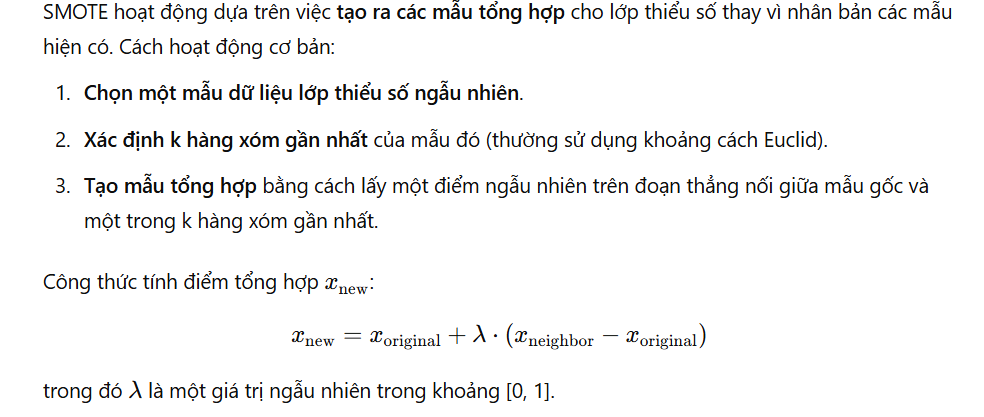

In [33]:
# Handing data imbalance
def augment_data(X, y, method='smote'):
  if method == 'smote':
    sampler = SMOTE(random_state=10)
    X_resampled, y_resampled = sampler.fit_resample(X, y)

  elif method == 'randomoversampler':
    sampler = RandomOverSampler(random_state=11)
    X_resampled, y_resampled = sampler.fit_resample(X, y)

  return X_resampled, y_resampled

In [34]:
def plot_class_distribution(y_train):
  class_distribution = pd.Series(y_train).value_counts()

  plt.figure(figsize=(15, 10))
  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
  plt.title('Phân phối dữ liệu mẫu ')
  plt.xlabel('Lớp')
  plt.ylabel('Số lượng mẫu')
  plt.show()

In [35]:
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X, y, test_size=0.2, random_state=42)

Chọn đặc trưng quan trọng cho bài toán

In [36]:
model = RandomForestClassifier(random_state=42)

In [37]:
rfe = RFE(estimator=model, n_features_to_select=13)
rfe.fit(X_train_base, y_train_base)

# Lấy danh sách các đặc trưng quan trọng
important_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
print("Important Features:", important_features)

Important Features: ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism', 'sleep_time', 'wake_time', 'sleep_duration', 'screen_on_time', 'skin_conductance', 'accelerometer', 'mobility_radius', 'mobility_distance']


In [38]:
X_2=data_cleaned[['Openness', 'Conscientiousness', 
                  'Extraversion', 'Agreeableness', 
                  'Neuroticism', 'sleep_time', 
                  'wake_time', 'sleep_duration', 
                  'screen_on_time', 'skin_conductance', 
                  'accelerometer', 'mobility_radius', 
                  'mobility_distance']].values
y_2=data_cleaned['PSS_score_category'].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)#.reshape(-1,1)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)#.reshape(-1,1)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)#.reshape(-1,1)

X_train shape: (2160, 13)
y_train shape: (2160,)
X_test shape: (600, 13)
y_test shape: (600,)
X_val shape: (240, 13)
y_val shape: (240,)


In [40]:
data_cleaned[important_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Openness,3000.0,3.020663,1.159310,1.005003,2.024510,3.050115,4.029171,4.997405
Conscientiousness,3000.0,3.007883,1.140511,1.000982,2.055579,3.022064,3.981639,4.999137
Extraversion,3000.0,3.002101,1.143507,1.000584,2.018888,2.985548,4.005973,4.997642
Agreeableness,3000.0,3.047659,1.161074,1.002206,2.043813,3.091778,4.050223,4.999881
Neuroticism,3000.0,2.963589,1.158624,1.000173,1.974606,2.940948,3.955566,4.996408
sleep_time,3000.0,7.002145,1.160442,5.003291,6.017217,6.978221,8.029503,8.999948
wake_time,3000.0,6.990567,1.161225,5.001927,5.992499,6.982260,7.999644,8.998371
sleep_duration,3000.0,7.477953,0.867602,6.000561,6.710527,7.463421,8.222883,8.999061
screen_on_time,3000.0,6.624776,3.145666,1.006874,3.909183,6.700975,9.339519,11.997871
skin_conductance,3000.0,2.762022,1.282752,0.501595,1.670218,2.769001,3.843533,4.999104


<!-- Áp dụng phương pháp Standard Scaler nhằm tránh mất cân bằng dữ liệu      -->
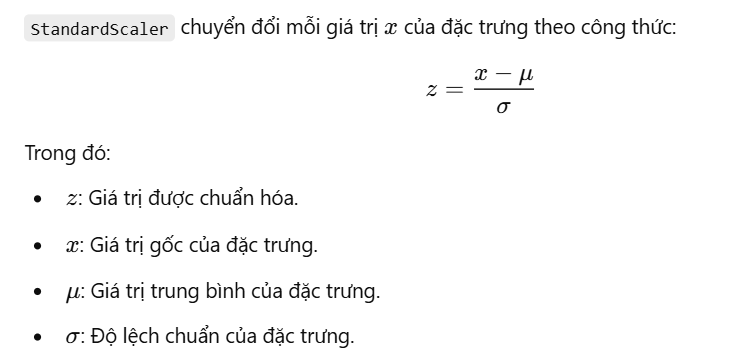

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training set size: (3768, 13)



C:\Users\vanho\AppData\Local\Temp\ipykernel_16136\3695400365.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


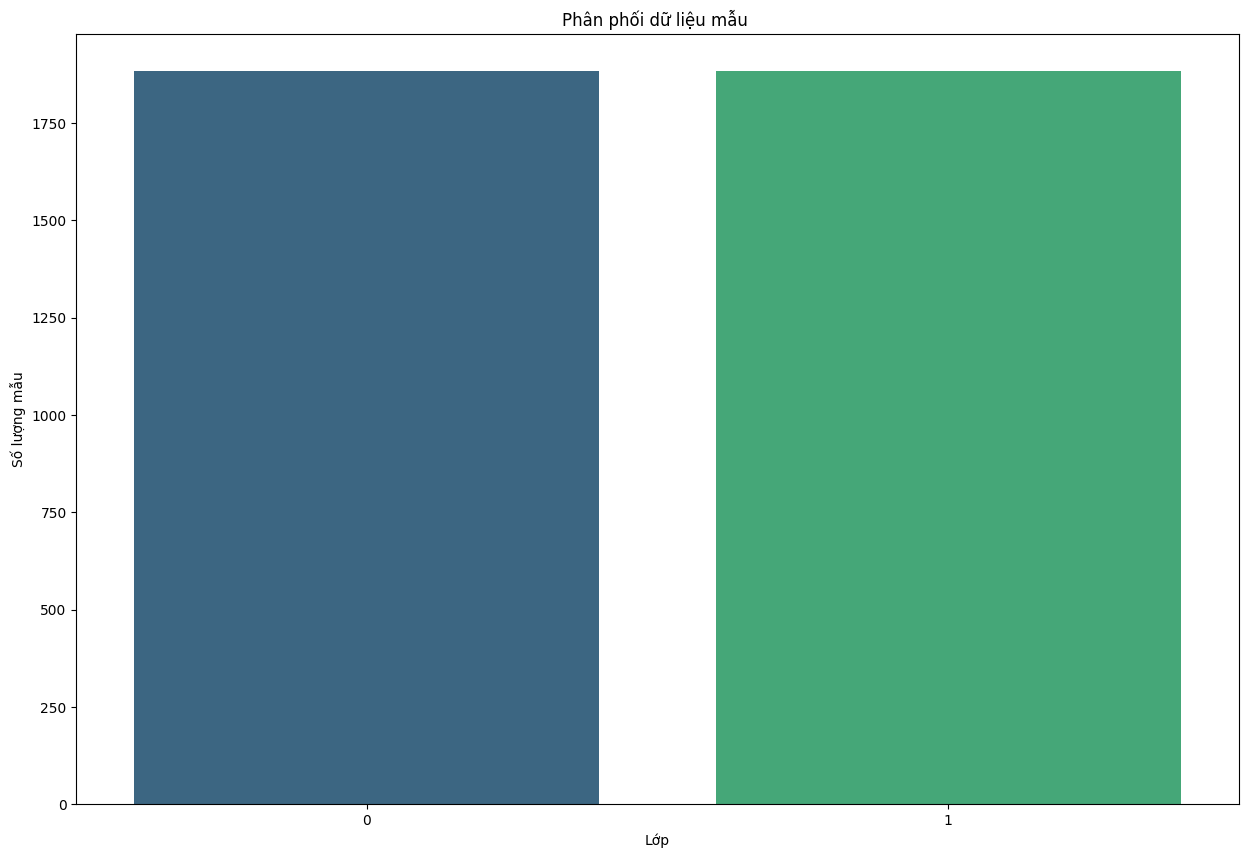

In [42]:
X_train_smote, y_train_smote = augment_data(X_train, y_train, method='smote')

print(f"Training set size: {X_train_smote.shape}\n")
plot_class_distribution(y_train_smote)

Hàm Train_KFold: Thực hiện quá trình huấn luyện mô hình với kỹ thuật K-Fold Cross-Validation.   
Sau đó tính toán và in ra độ chính xác (accuracy_score) trên mỗi lần chia và trung bình cho tất cả các lần

In [43]:
def Train_KFold(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=10)
    scores = []

    for train_index, test_index in kf.split(X):
        # Split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Training model
        model.fit(X_train, y_train)

        # Predict on the test set of each k-fold
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

    print(f"Accuracy on each fold: {scores}")
    print(f"Mean accuracy: {round(sum(scores) / len(scores)*100, 2)}%\n")
    return model

In [44]:
# Hàm GridSearch để tìm tham số tối ưu
def Gridsearch_params(model, param_grid, X, y):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X, y)
    
    # Lấy mô hình tốt nhất
    best_model = grid_search.best_estimator_

    print("Best parameters found:", grid_search.best_params_)
    print("Best mean accuracy:", round(grid_search.best_score_ * 100, 2), "%\n")
    
    return best_model


In [45]:
def evolution_models(model, X_test, y_test, average='weighted'):
    # Dự đoán nhãn
    y_pred = model.predict(X_test)
    
    # Báo cáo phân loại
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("------------------------------------------")

    # Các chỉ số trọng số trung bình
    print(f"Recall : {recall_score(y_test, y_pred, average=average):0.4f}")
    print(f"Precision : {precision_score(y_test, y_pred, average=average):0.4f}")
    print(f"F1 score : {f1_score(y_test, y_pred, average=average):0.4f} \n")   

    # Ma trận nhầm lẫn
    labels = sorted(set(y_test))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix heatmap:")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()
    
    # # Lưu hình ảnh ma trận nhầm lẫn
    # plt.savefig("confusion_matrix.png")
    # print("Confusion matrix heatmap saved as 'confusion_matrix.png'.")


# Mô hình Logistic Regression

Áp dụng tham số mặc định

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.88      1.00      0.94       212

    accuracy                           0.88       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.78      0.88      0.83       240

------------------------------------------
Recall : 0.8833
Precision : 0.7803
F1 score : 0.8286 



d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

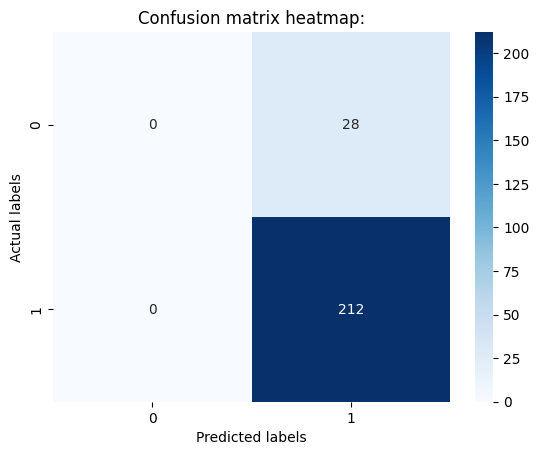

In [46]:
lr_1=LogisticRegression(penalty='l2',C=10).fit(X_train,y_train)
evolution_models(lr_1,X_val,y_val)

Áp dụng tham số sau khi sử dụng thuật toán smote

Accuracy on each fold: [0.5106100795755968, 0.553050397877984, 0.5278514588859416, 0.5644090305444888, 0.5617529880478087]
Mean accuracy: 54.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.07      0.07        28
           1       0.88      0.89      0.88       212

    accuracy                           0.79       240
   macro avg       0.48      0.48      0.48       240
weighted avg       0.78      0.79      0.79       240

------------------------------------------
Recall : 0.7917
Precision : 0.7850
F1 score : 0.7883 



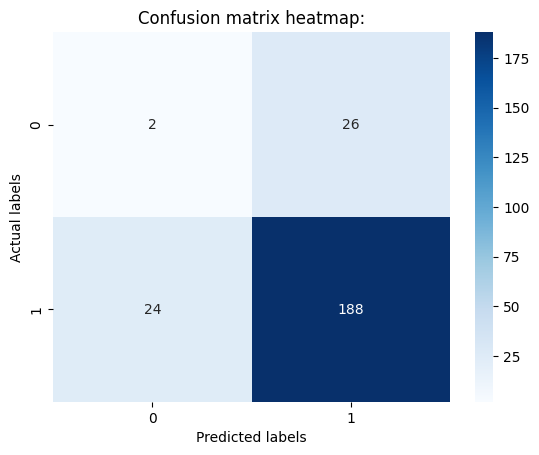

In [47]:
model_lr=LogisticRegression(penalty='l2',C=10)
smote_lr=Train_KFold(model_lr,X_train_smote,y_train_smote)
evolution_models(smote_lr,X_val,y_val)

Áp dụng tham số mặc định có sử dụng phương pháp param_grid nhằm chọn ra tham số tối ưu


Fitting 5 folds for each of 108 candidates, totalling 540 fits


d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn

Best parameters found: {'C': 0.001, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best mean accuracy: 87.22 %

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.88      1.00      0.94       212

    accuracy                           0.88       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.78      0.88      0.83       240

------------------------------------------
Recall : 0.8833
Precision : 0.7803
F1 score : 0.8286 



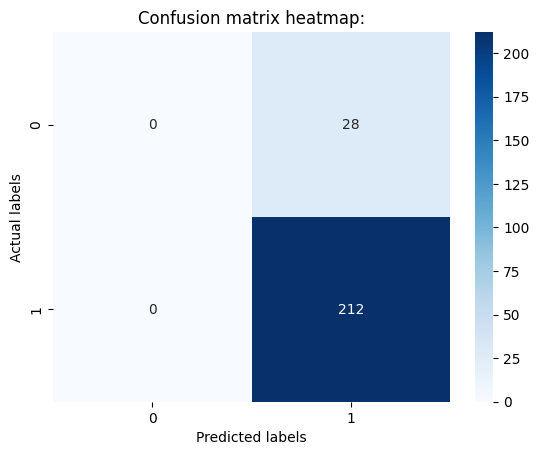

In [48]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1','l2'],
    'solver': ['saga','lbfgs','liblinear'],
    'max_iter': [200, 300, 500]
}
grid_lr=Gridsearch_params(model_lr,param_grid,X_train,y_train)
evolution_models(grid_lr,X_val,y_val)

Sử dụng phương pháp trên nhưng với tham số smote

Fitting 5 folds for each of 108 candidates, totalling 540 fits


d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn

Best parameters found: {'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best mean accuracy: 54.99 %

Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.14      0.09        28
           1       0.87      0.75      0.81       212

    accuracy                           0.68       240
   macro avg       0.47      0.45      0.45       240
weighted avg       0.78      0.68      0.72       240

------------------------------------------
Recall : 0.6792
Precision : 0.7757
F1 score : 0.7221 



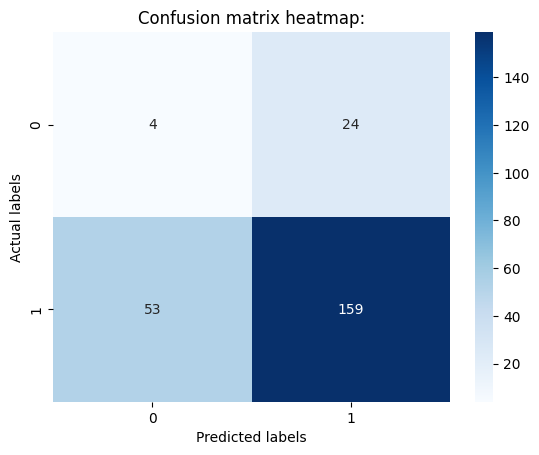

In [49]:
grid_lr=Gridsearch_params(model_lr,param_grid,X_train_smote,y_train_smote)
evolution_models(grid_lr,X_val,y_val)

# Mô hình Decision tree

In [50]:
tree_base = DecisionTreeClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       0.12      1.00      0.21        28
           1       0.00      0.00      0.00       212

    accuracy                           0.12       240
   macro avg       0.06      0.50      0.10       240
weighted avg       0.01      0.12      0.02       240

------------------------------------------
Recall : 0.1167
Precision : 0.0136
F1 score : 0.0244 



d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

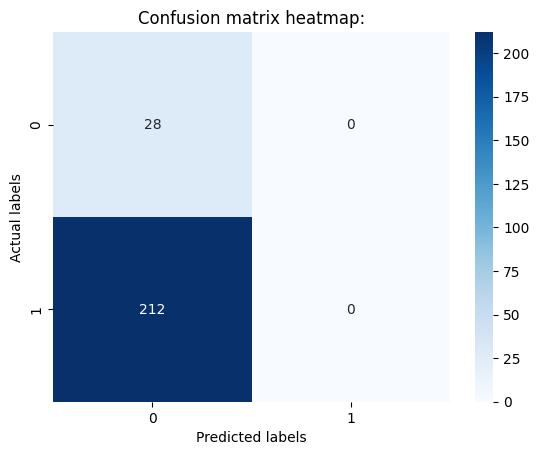

In [51]:
Normal_tree=DecisionTreeClassifier().fit(X_train,y_train)
evolution_models(Normal_tree,X_val,y_val)

Accuracy on each fold: [0.7705570291777188, 0.7652519893899205, 0.7745358090185677, 0.796812749003984, 0.7636122177954847]
Mean accuracy: 77.42%

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.07      0.09        28
           1       0.88      0.92      0.90       212

    accuracy                           0.82       240
   macro avg       0.50      0.50      0.50       240
weighted avg       0.79      0.82      0.81       240

------------------------------------------
Recall : 0.8250
Precision : 0.7928
F1 score : 0.8080 



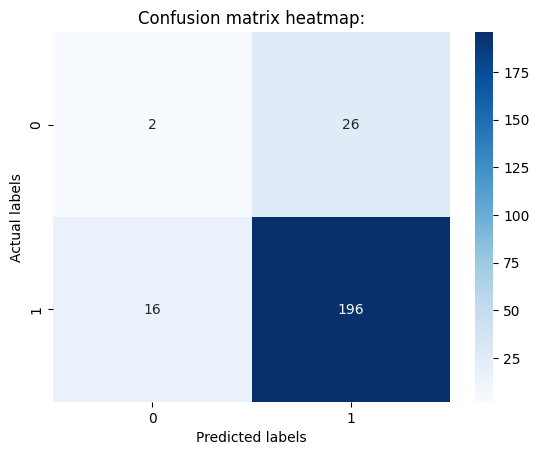

In [52]:
Smote_tree=Train_KFold(tree_base,X_train_smote,y_train_smote)
evolution_models(Smote_tree,X_val,y_val)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best mean accuracy: 87.04 %

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.88      1.00      0.94       212

    accuracy                           0.88       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.78      0.88      0.83       240

------------------------------------------
Recall : 0.8833
Precision : 0.7803
F1 score : 0.8286 



d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

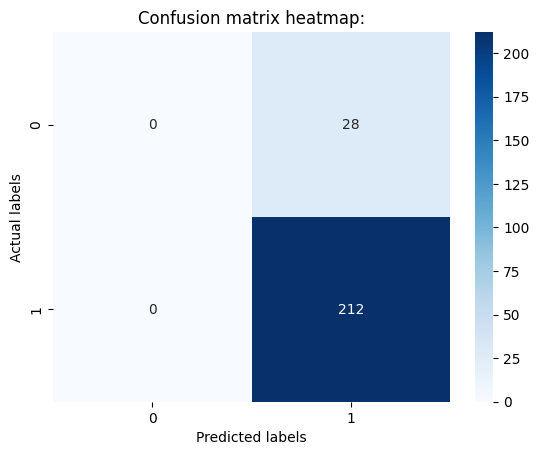

In [53]:
param_grid_2={
    'criterion': ['gini', 'entropy'],       
    'max_depth': [3, 5, 10],           
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4]   
}
gird_tree=Gridsearch_params(tree_base,param_grid_2,X_train,y_train)
evolution_models(gird_tree,X_val,y_val)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best mean accuracy: 65.92 %

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.88      1.00      0.94       212

    accuracy                           0.88       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.78      0.88      0.83       240

------------------------------------------
Recall : 0.8833
Precision : 0.7803
F1 score : 0.8286 



d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

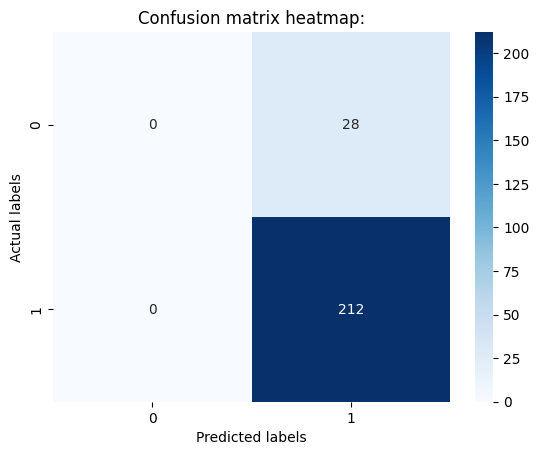

In [54]:
gird_smote_tree=Gridsearch_params(tree_base,param_grid_2,X_train_smote,y_train_smote)
evolution_models(gird_smote_tree,X_val,y_val)

# Random forest

In [55]:
forest_base=RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.12      1.00      0.21        28
           1       0.00      0.00      0.00       212

    accuracy                           0.12       240
   macro avg       0.06      0.50      0.10       240
weighted avg       0.01      0.12      0.02       240

------------------------------------------
Recall : 0.1167
Precision : 0.0136
F1 score : 0.0244 



d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

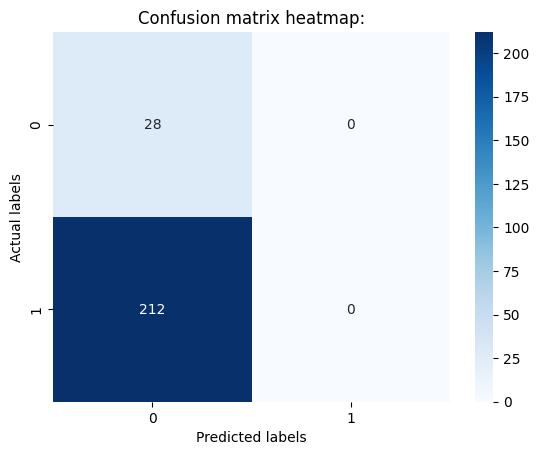

In [56]:
rf_normal = RandomForestClassifier(random_state=42).fit(X_train, y_train)
evolution_models(rf_normal, X_val, y_val)

Accuracy on each fold: [0.9005305039787799, 0.8952254641909815, 0.9151193633952255, 0.9123505976095617, 0.9282868525896414]
Mean accuracy: 91.03%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.88      1.00      0.94       212

    accuracy                           0.88       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.78      0.88      0.83       240

------------------------------------------
Recall : 0.8833
Precision : 0.7803
F1 score : 0.8286 



d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

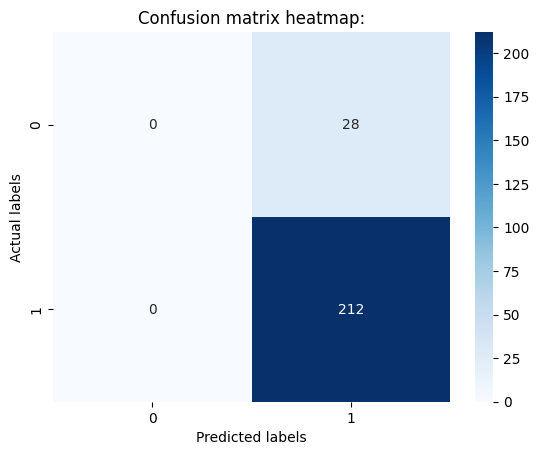

In [57]:
smote_forest=Train_KFold(forest_base,X_train_smote,y_train_smote)
evolution_models(smote_forest,X_val,y_val)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best mean accuracy: 87.22 %

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.88      1.00      0.94       212

    accuracy                           0.88       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.78      0.88      0.83       240

------------------------------------------
Recall : 0.8833
Precision : 0.7803
F1 score : 0.8286 



d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

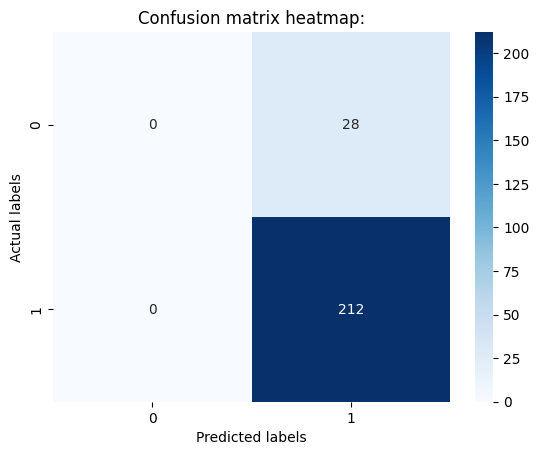

In [58]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],             # Số lượng cây trong rừng
    'max_depth': [10, 20, 30],           # Độ sâu tối đa của cây
    'min_samples_split': [ 5, 10],           # Số mẫu tối thiểu để tách
    'min_samples_leaf': [ 2, 4],             # Số mẫu tối thiểu tại mỗi lá
    'criterion': ['gini', 'entropy']           # Tiêu chí đánh giá
}
best_rf_model = Gridsearch_params(forest_base, param_grid_rf, X_train, y_train)
evolution_models(best_rf_model, X_val, y_val)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best mean accuracy: 90.23 %

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.88      1.00      0.94       212

    accuracy                           0.88       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.78      0.88      0.83       240

------------------------------------------
Recall : 0.8833
Precision : 0.7803
F1 score : 0.8286 



d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

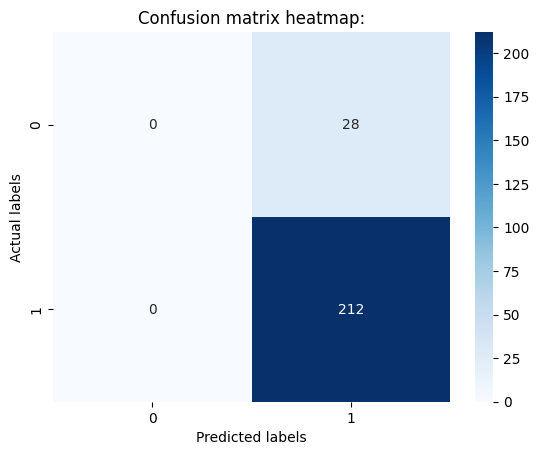

In [59]:
best_smote_forest=Gridsearch_params(forest_base,param_grid_rf,X_train_smote,y_train_smote)
evolution_models(best_smote_forest,X_val,y_val)

# SVM

In [60]:
svm_model=SVC()

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.88      1.00      0.94       212

    accuracy                           0.88       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.78      0.88      0.83       240

------------------------------------------
Recall : 0.8833
Precision : 0.7803
F1 score : 0.8286 



d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

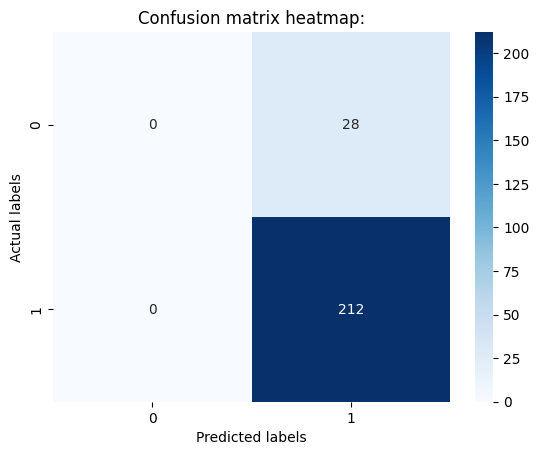

In [61]:
normal_svm = SVC().fit(X_train,y_train)
evolution_models(normal_svm, X_val, y_val)

Accuracy on each fold: [0.8076923076923077, 0.8594164456233422, 0.8567639257294429, 0.8764940239043825, 0.8180610889774237]
Mean accuracy: 84.37%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.88      1.00      0.94       212

    accuracy                           0.88       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.78      0.88      0.83       240

------------------------------------------
Recall : 0.8833
Precision : 0.7803
F1 score : 0.8286 



d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

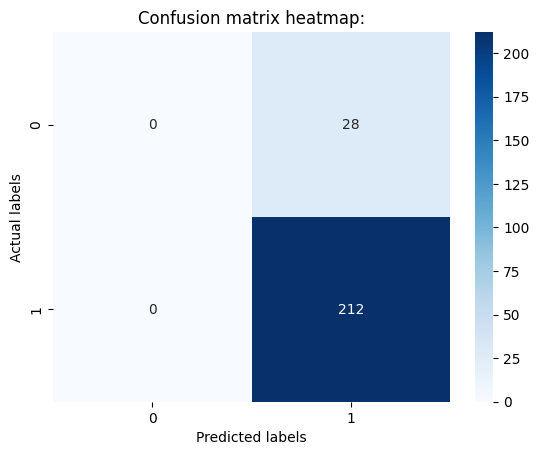

In [62]:
svm_smote = Train_KFold(svm_model, X_train_smote, y_train_smote)
evolution_models(svm_smote, X_val, y_val)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Best mean accuracy: 87.22 %

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.88      1.00      0.94       212

    accuracy                           0.88       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.78      0.88      0.83       240

------------------------------------------
Recall : 0.8833
Precision : 0.7803
F1 score : 0.8286 



d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

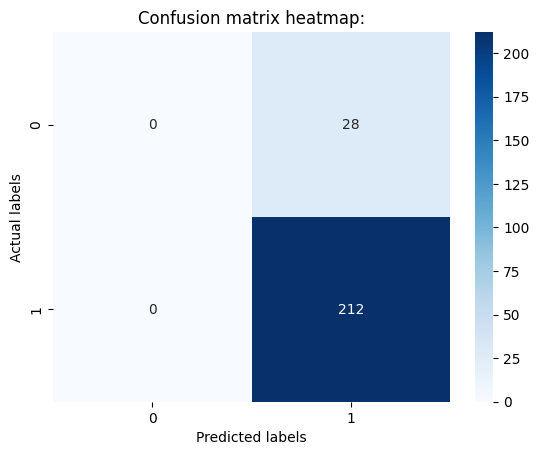

In [63]:
param_grid_3 = {
    'C': [0.1, 1, 10],                   
    'kernel': [ 'poly', 'rbf', 'sigmoid'], 
    'gamma': ['scale', 'auto'],               
    'degree': [2, 3, 4]                       
}
grid_svm=Gridsearch_params(svm_model,param_grid_3,X_train,y_train)
evolution_models(grid_svm,X_val,y_val)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best mean accuracy: 92.3 %

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.88      1.00      0.94       212

    accuracy                           0.88       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.78      0.88      0.83       240

------------------------------------------
Recall : 0.8833
Precision : 0.7803
F1 score : 0.8286 



d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

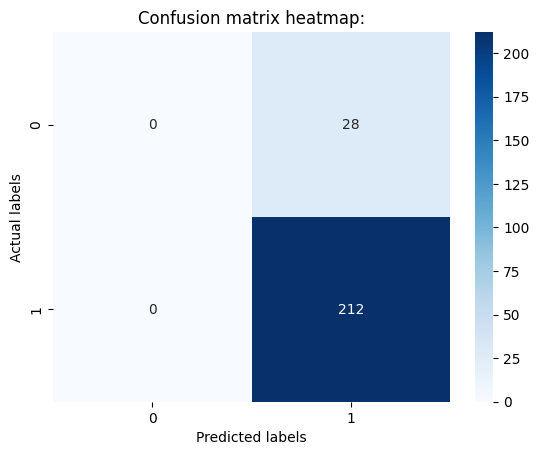

In [64]:
grid_smote_svm=Gridsearch_params(svm_model,param_grid_3,X_train_smote,y_train_smote)
evolution_models(grid_smote_svm,X_val,y_val)

In [65]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Thao tác trên tập test

d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.88      1.00      0.93       526

    accuracy                           0.88       600
   macro avg       0.44      0.50      0.47       600
weighted avg       0.77      0.88      0.82       600

------------------------------------------
Recall : 0.8767
Precision : 0.7685
F1 score : 0.8191 



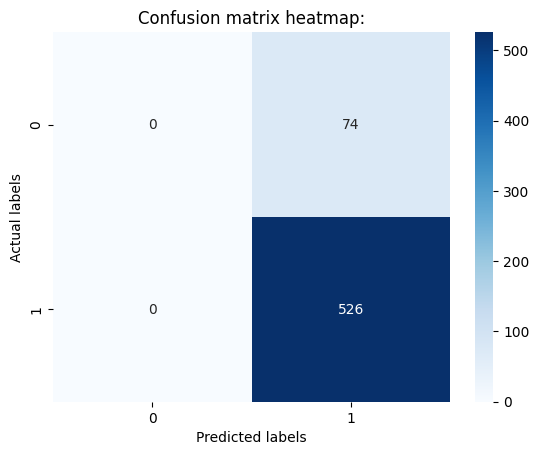

In [66]:
Logistic_regression= LogisticRegression(C=0.001,max_iter=200,penalty='l1',solver='saga').fit(X_train,y_train)
evolution_models(Logistic_regression,X_test,y_test )


Accuracy on each fold: [0.5106100795755968, 0.5517241379310345, 0.5278514588859416, 0.5630810092961488, 0.5617529880478087]
Mean accuracy: 54.3%

Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.49      0.21        74
           1       0.88      0.55      0.67       526

    accuracy                           0.54       600
   macro avg       0.51      0.52      0.44       600
weighted avg       0.79      0.54      0.62       600

------------------------------------------
Recall : 0.5383
Precision : 0.7903
F1 score : 0.6168 



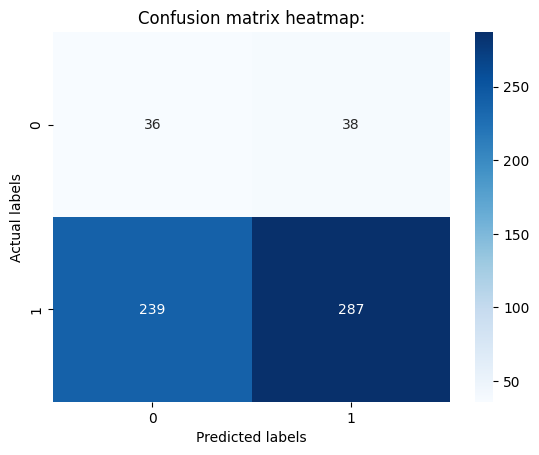

In [67]:
Logistic_regression_smote=LogisticRegression(C=0.1,max_iter=200,penalty='l2',solver='saga')
Logistic_regression_smote=Train_KFold(Logistic_regression_smote,X_train_smote,y_train_smote)
evolution_models(Logistic_regression_smote,X_test,y_test )

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.01      0.03        74
           1       0.88      1.00      0.93       526

    accuracy                           0.88       600
   macro avg       0.69      0.51      0.48       600
weighted avg       0.83      0.88      0.82       600

------------------------------------------
Recall : 0.8767
Precision : 0.8313
F1 score : 0.8222 



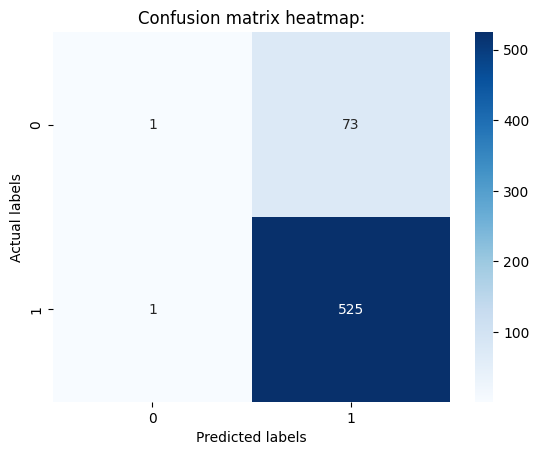

In [68]:

Decision_tree= DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=10).fit(X_train,y_train)
evolution_models(Decision_tree,X_test,y_test )


Accuracy on each fold: [0.6737400530503979, 0.6379310344827587, 0.6830238726790451, 0.6772908366533864, 0.6879150066401063]
Mean accuracy: 67.2%

Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.50      0.20        74
           1       0.88      0.52      0.66       526

    accuracy                           0.52       600
   macro avg       0.50      0.51      0.43       600
weighted avg       0.79      0.52      0.60       600

------------------------------------------
Recall : 0.5200
Precision : 0.7885
F1 score : 0.6006 



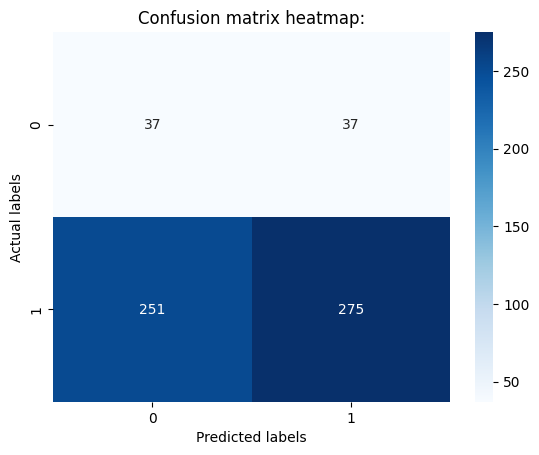

In [69]:
Decision_tree_smote=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=1,min_samples_split=2)
Decision_tree_smote=Train_KFold(Decision_tree_smote,X_train_smote,y_train_smote)
evolution_models(Decision_tree_smote,X_test,y_test )

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.88      1.00      0.93       526

    accuracy                           0.88       600
   macro avg       0.44      0.50      0.47       600
weighted avg       0.77      0.88      0.82       600

------------------------------------------
Recall : 0.8767
Precision : 0.7685
F1 score : 0.8191 



d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

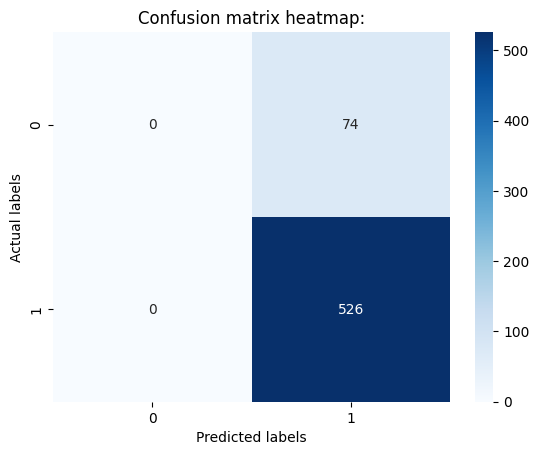

In [70]:
Random_forest= RandomForestClassifier(criterion='gini',max_depth=20,min_samples_leaf=2,min_samples_split=10,n_estimators=200 ).fit(X_train,y_train)
evolution_models(Random_forest,X_test,y_test )


Accuracy on each fold: [0.8885941644562334, 0.8846153846153846, 0.9058355437665783, 0.900398406374502, 0.8911022576361222]
Mean accuracy: 89.41%

Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.08      0.08        74
           1       0.87      0.87      0.87       526

    accuracy                           0.77       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.77      0.77      0.77       600

------------------------------------------
Recall : 0.7733
Precision : 0.7733
F1 score : 0.7733 



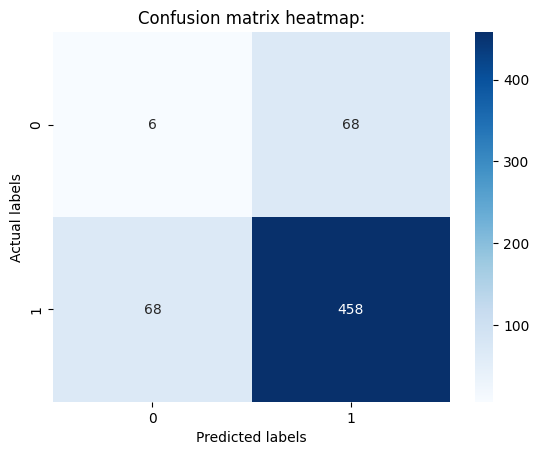

In [71]:
Random_forest_smote=RandomForestClassifier(criterion='gini',max_depth=30,min_samples_leaf=2,min_samples_split=5,n_estimators=200)
Random_forest_smote=Train_KFold(Random_forest_smote,X_train_smote,y_train_smote)
evolution_models(Random_forest_smote,X_test,y_test )

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.88      1.00      0.93       526

    accuracy                           0.88       600
   macro avg       0.44      0.50      0.47       600
weighted avg       0.77      0.88      0.82       600

------------------------------------------
Recall : 0.8767
Precision : 0.7685
F1 score : 0.8191 



d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

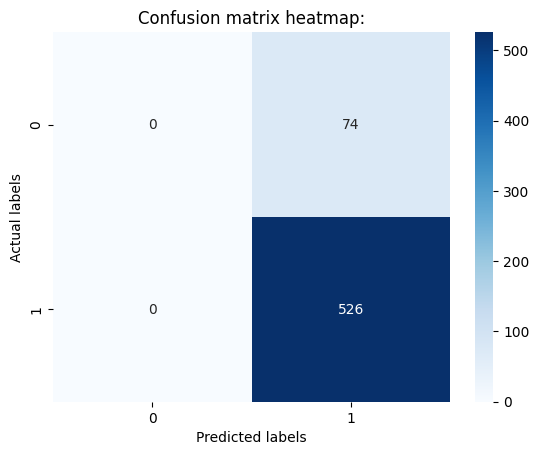

In [72]:
SVM= SVC(C=0.1,degree=2,gamma='scale',kernel='poly').fit(X_train,y_train)
evolution_models(SVM,X_test,y_test )


Accuracy on each fold: [0.9045092838196287, 0.9217506631299734, 0.9190981432360743, 0.9389110225763613, 0.900398406374502]
Mean accuracy: 91.69%

Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.19      0.16        74
           1       0.88      0.83      0.85       526

    accuracy                           0.75       600
   macro avg       0.51      0.51      0.50       600
weighted avg       0.79      0.75      0.77       600

------------------------------------------
Recall : 0.7467
Precision : 0.7865
F1 score : 0.7652 



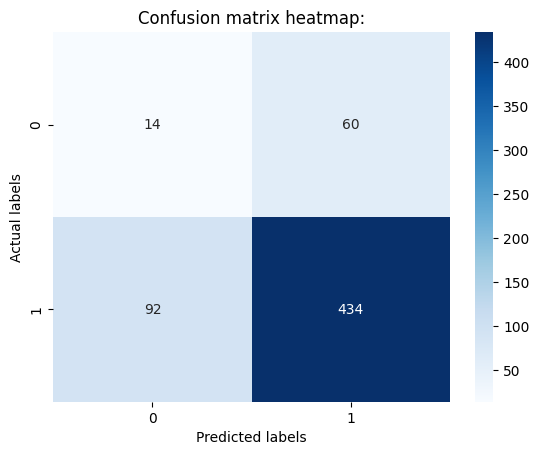

In [73]:
SVM_smote=SVC(C=10,degree=2,gamma='scale',kernel='rbf')
SVM_smote=Train_KFold(SVM_smote,X_train_smote,y_train_smote)
evolution_models(SVM_smote,X_test,y_test )

# Áp dụng mô hình Voting Classifier

In [74]:

# Define Models
clf1 = LogisticRegression(C=0.001,max_iter=200,penalty='l1',solver='saga')

clf2 = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=10) 

clf3 = RandomForestClassifier(criterion='gini',max_depth=20,min_samples_leaf=2,min_samples_split=10,n_estimators=200 )

clf4 = SVC(C=0.1,degree=2,gamma='scale',kernel='poly', probability=True)

# Define Ensembles
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('rf', clf3), ('svc', clf4)], voting='hard')
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('rf', clf3), ('svc', clf4)], voting='soft')


# Train and Evaluate Ensembles
for clf, label in zip([eclf1, eclf2], ['Hard Voting', 'Soft Voting']):
    # Train model
    clf.fit(X_train, y_train)
    # Make predictions
    y_pred = clf.predict(X_test)
    print("------------------------------------------")
    print(f'Performance of {label} classifier')
    print(classification_report(y_test, y_pred))

    print("------------------------------------------")
    print('Recall : {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('Precision : {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('F1 score : {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

------------------------------------------
Performance of Hard Voting classifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.88      1.00      0.93       526

    accuracy                           0.88       600
   macro avg       0.44      0.50      0.47       600
weighted avg       0.77      0.88      0.82       600

------------------------------------------
Recall : 0.8767
Precision : 0.7685
F1 score : 0.8191


d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

------------------------------------------
Performance of Soft Voting classifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.88      1.00      0.93       526

    accuracy                           0.88       600
   macro avg       0.44      0.50      0.47       600
weighted avg       0.77      0.88      0.82       600

------------------------------------------
Recall : 0.8767
Precision : 0.7685
F1 score : 0.8191


d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [75]:
clf1= LogisticRegression(C=0.1,max_iter=200,penalty='l2',solver='saga')

clf2= DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=1,min_samples_split=2)

clf3= RandomForestClassifier(criterion='gini',max_depth=30,min_samples_leaf=2,min_samples_split=5,n_estimators=200)

clf4= SVC(C=10,degree=2,gamma='scale',kernel='rbf',probability=True)

# Define Ensembles
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('rf', clf3), ('svc', clf4)], voting='hard')
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('rf', clf3), ('svc', clf4)], voting='soft')


# Train and Evaluate Ensembles
for clf, label in zip([eclf1, eclf2], ['Hard Voting', 'Soft Voting']):
    # Train model
    clf.fit(X_train_smote, y_train_smote)
    # Make predictions
    y_pred = clf.predict(X_test)
    print("------------------------------------------")
    print(f'Performance of {label} classifier')
    print(classification_report(y_test, y_pred))

    print("------------------------------------------")
    print('Recall : {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('Precision : {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('F1 score : {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

------------------------------------------
Performance of Hard Voting classifier
              precision    recall  f1-score   support

           0       0.11      0.32      0.17        74
           1       0.87      0.64      0.74       526

    accuracy                           0.60       600
   macro avg       0.49      0.48      0.45       600
weighted avg       0.78      0.60      0.67       600

------------------------------------------
Recall : 0.6017
Precision : 0.7773
F1 score : 0.6678
------------------------------------------
Performance of Soft Voting classifier
              precision    recall  f1-score   support

           0       0.20      0.11      0.14        74
           1       0.88      0.94      0.91       526

    accuracy                           0.84       600
   macro avg       0.54      0.52      0.53       600
weighted avg       0.80      0.84      0.81       600

------------------------------------------
Recall : 0.8367
Precision : 0.7980
F1 score :